In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import xarray as xr

In [4]:
# directories
DATA_PATH_CHL = "../CHL_DATA/InputData_GTL/input_data_olci.nc"
DATA_PATH_Features = "../CHL_DATA/InputData_GTL/Features"

In [5]:
# read all data into a dataframe

chl_data = xr.open_dataset(DATA_PATH_CHL)
df = chl_data.to_dataframe()

# read all features into a dataframe
wind_v10 = np.load(f'{DATA_PATH_Features}/wind_v10.npy')[1:-19,:,:]
df['Wind v10'] = wind_v10.flatten()
wind_u10 = np.load(f'{DATA_PATH_Features}/wind_u10.npy')[1:-19,:,:]
df['Wind u10'] = wind_u10.flatten()
pres_t2m = np.load(f'{DATA_PATH_Features}/pres_t2m.npy')[1:-13,:,:]
df['Air Temperature'] = pres_t2m.flatten()
pres_tp = np.load(f'{DATA_PATH_Features}/pres_tp.npy')[1:-13,:,:]
df['Precipitation'] = pres_tp.flatten()
pres_rad = np.load(f'{DATA_PATH_Features}/pres_rad.npy')
df['Radiation'] = pres_rad.flatten()
sst = np.load(f'{DATA_PATH_Features}/sst_values.npy')[1:-8,:,:]
df['SST'] = sst.flatten()
wave_VHM0 = np.load(f'{DATA_PATH_Features}/VHM01_data.npy')
wave_VHM0 = np.append(wave_VHM0 , np.load(f'{DATA_PATH_Features}/VHM02_data.npy'), axis=0)
df['Wave VHM0'] = wave_VHM0.flatten()
wave_VMDR = np.load(f'{DATA_PATH_Features}/VMDR1_data.npy')
wave_VMDR = np.append(wave_VMDR , np.load(f'{DATA_PATH_Features}/VMDR2_data.npy'), axis=0)
df['Wave VMDR'] = wave_VMDR.flatten()
topo = np.load(f'{DATA_PATH_Features}/topo.npy')
topo =  np.repeat(topo[np.newaxis, :, :], 2540, axis=0)
df['Topography'] = topo.flatten()

In [6]:
df_plot = df[['CHL', 'Wind v10', 'Wind u10', 'Air Temperature', 'Precipitation', 'Radiation', 'SST', 'Wave VHM0', 'Wave VMDR','Topography']]
df_plot = df_plot.dropna()
columns = df_plot.columns
df_plot_norm = (df_plot - df_plot.mean()) / (df_plot.max() - df_plot.min())

In [7]:
df_plot_norm

CHL  Wind v10  Wind u10  Air Temperature  \
time       lat       lon                                                        
2016-05-01 55.013123 17.587975 -0.008768 -0.071683 -0.123606        -0.126641   
                     17.605696 -0.015156 -0.071426 -0.122959        -0.126651   
                     17.623417  0.005111 -0.071169 -0.122311        -0.126661   
                     17.641140 -0.006951 -0.070912 -0.121664        -0.126672   
                     17.658861 -0.011669 -0.070655 -0.121016        -0.126682   
...                                  ...       ...       ...              ...   
2023-04-14 56.682869 19.803165  0.010891  0.031361 -0.276303        -0.145248   
                     19.820887 -0.001165  0.031377 -0.276129        -0.144817   
                     19.838608  0.000111  0.031394 -0.275954        -0.144384   
           56.693851 19.785442  0.000941  0.031131 -0.276525        -0.145791   
                     19.820887  0.026503  0.031160 -0.276188        -0.144935   

                                Precipitation  Radiation       SST  Wave VHM0  \
time       lat       lon                                                        
2016-05-01 55.013123 17.587975      -0.017581   0.139279 -0.244271  -0.128328   
                     17.605696      -0.017581   0.139098 -0.241522  -0.128417   
                     17.623417      -0.017581   0.138916 -0.239163  -0.128508   
                     17.641140      -0.017581   0.138735 -0.237199  -0.128595   
                     17.658861      -0.017581   0.138553 -0.236020  -0.128681   
...                                       ...        ...       ...        ...   
2023-04-14 56.682869 19.803165      -0.007039  -0.074422 -0.340146   0.020437   
                     19.820887      -0.006955  -0.074399 -0.340146   0.021064   
                     19.838608      -0.006870  -0.074377 -0.340146   0.021701   
           56.693851 19.785442      -0.007107  -0.074588 -0.339360   0.019736   
                     19.820887      -0.006937  -0.074538 -0.339360   0.020838   

                                Wave VMDR  Topography  
time       lat       lon                               
2016-05-01 55.013123 17.587975  -0.377819    0.294698  
                     17.605696  -0.378526    0.294698  
                     17.623417  -0.379218    0.294698  
                     17.641140  -0.379898    0.296097  
                     17.658861  -0.380573    0.296097  
...                                   ...         ...  
2023-04-14 56.682869 19.803165  -0.427928   -0.508799  
                     19.820887  -0.428740   -0.508799  
                     19.838608  -0.429350   -0.503204  
           56.693851 19.785442  -0.426715   -0.508799  
                     19.820887  -0.428632   -0.515092  

[15850263 rows x 10 columns]

ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2016-05-01 00:00:00'), 55.01312255859375, 17.587974548339844),
       (Timestamp('2016-05-01 00:00:00'), 55.01312255859375, 17.605695724487305),
       (Timestamp('2016-05-01 00:00:00'), 55.01312255859375, 17.623416900634766),
       ...,
       (Timestamp('2023-04-14 00:00:00'), 56.68286895751953, 19.838607788085938),
       (Timestamp('2023-04-14 00:00:00'), 56.693851470947266, 19.785442352294922),
       (Timestamp('2023-04-14 00:00:00'), 56.693851470947266, 19.820886611938477)],
      dtype=object)

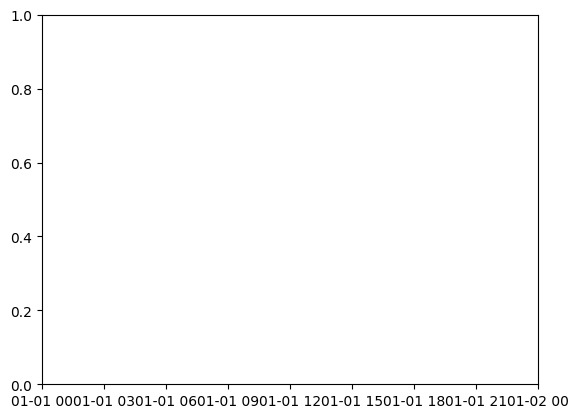

In [8]:
plt.plot(df_plot_norm['Precipitation'])

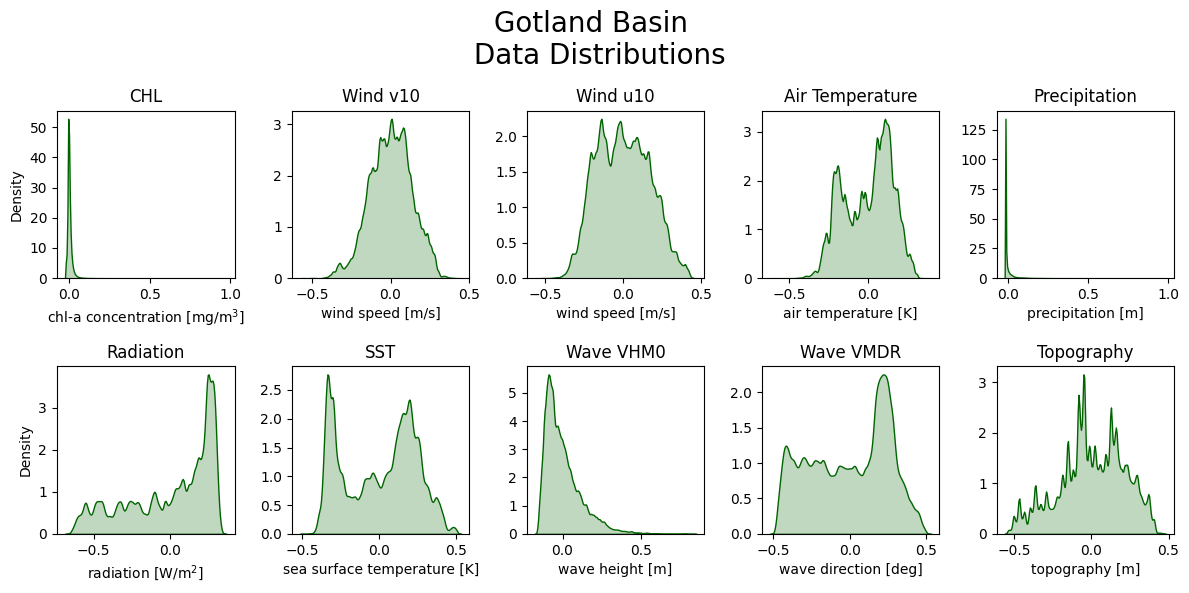

In [9]:
#%% Create a histogram of the data distributions
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
ax = axes.flatten()

labels = ['chl-a concentration [mg/m$^3$]', 'wind speed [m/s]', 'wind speed [m/s]', 'air temperature [K]', 'precipitation [m]', 'radiation [W/m$^2$]', 'sea surface temperature [K]', 'wave height [m]', 'wave direction [deg]', 'topography [m]']

for i in range(len(columns)):
    sns.kdeplot(data=df_plot_norm[columns[i]], ax=ax[i], color='darkgreen', fill=True)
    ax[i].set_title(columns[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("Density")
ax[5].set_ylabel("Density")
fig.suptitle('Gotland Basin \n Data Distributions', fontsize=20)
plt.tight_layout()
plt.show()

In [42]:
df = df.reset_index()
df

,time,lat,lon,CHL,mask,Wind v10,Wind u10,Air Temperature,Precipitation,Radiation,SST,Wave VHM0,Wave VMDR,Topography
0,2016-05-01,55.013123,17.587975,2.156626,1.0,-1.946046,-2.238232,280.833832,0.000000,3875112.00,279.410004,0.236044,43.190620,-35.900002
1,2016-05-01,55.013123,17.605696,1.410407,1.0,-1.938458,-2.219258,280.833435,0.000000,3874335.00,279.479980,0.235563,42.938053,-35.900002
2,2016-05-01,55.013123,17.623417,3.777887,1.0,-1.930870,-2.200285,280.833038,0.000000,3873557.75,279.540009,0.235074,42.691021,-35.900002
3,2016-05-01,55.013123,17.641140,2.368848,1.0,-1.923282,-2.181309,280.832611,0.000000,3872780.50,279.589996,0.234603,42.448307,-35.700001
4,2016-05-01,55.013123,17.658861,1.817699,1.0,-1.915694,-2.162336,280.832214,0.000000,3872003.50,279.619995,0.234142,42.206985,-35.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65023995,2023-04-14,56.759766,20.334810,NaN,1.0,1.054198,-6.551299,280.741425,0.000025,2960965.75,277.019989,0.833444,29.255646,-78.300003
65023996,2023-04-14,56.759766,20.352531,NaN,1.0,1.054352,-6.533205,280.797424,0.000026,2961182.25,276.989990,0.822543,29.497917,-78.300003
65023997,2023-04-14,56.759766,20.370253,NaN,1.0,1.054505,-6.515111,280.853455,0.000027,2961398.75,276.959991,0.811567,29.759289,-73.300003
65023998,2023-04-14,56.759766,20.387974,NaN,1.0,1.054658,-6.497017,280.909485,0.000028,2961615.50,276.959991,0.802912,29.951065,-73.300003


In [43]:
# Normalize all values
df['Longitude'] = (df['lon'] - np.min(df['lon'])) / (np.max(df['lon']) - np.min(df['lon']))
df['Latitude'] = (df['lat'] - np.min(df['lat'])) / (np.max(df['lat']) - np.min(df['lat']))

df

,time,lat,lon,CHL,mask,Wind v10,Wind u10,Air Temperature,Precipitation,Radiation,SST,Wave VHM0,Wave VMDR,Topography,Longitude,Latitude
0,2016-05-01,55.013123,17.587975,2.156626,1.0,-1.946046,-2.238232,280.833832,0.000000,3875112.00,279.410004,0.236044,43.190620,-35.900002,0.000000,0.0
1,2016-05-01,55.013123,17.605696,1.410407,1.0,-1.938458,-2.219258,280.833435,0.000000,3874335.00,279.479980,0.235563,42.938053,-35.900002,0.006289,0.0
2,2016-05-01,55.013123,17.623417,3.777887,1.0,-1.930870,-2.200285,280.833038,0.000000,3873557.75,279.540009,0.235074,42.691021,-35.900002,0.012578,0.0
3,2016-05-01,55.013123,17.641140,2.368848,1.0,-1.923282,-2.181309,280.832611,0.000000,3872780.50,279.589996,0.234603,42.448307,-35.700001,0.018868,0.0
4,2016-05-01,55.013123,17.658861,1.817699,1.0,-1.915694,-2.162336,280.832214,0.000000,3872003.50,279.619995,0.234142,42.206985,-35.700001,0.025157,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65023995,2023-04-14,56.759766,20.334810,NaN,1.0,1.054198,-6.551299,280.741425,0.000025,2960965.75,277.019989,0.833444,29.255646,-78.300003,0.974843,1.0
65023996,2023-04-14,56.759766,20.352531,NaN,1.0,1.054352,-6.533205,280.797424,0.000026,2961182.25,276.989990,0.822543,29.497917,-78.300003,0.981132,1.0
65023997,2023-04-14,56.759766,20.370253,NaN,1.0,1.054505,-6.515111,280.853455,0.000027,2961398.75,276.959991,0.811567,29.759289,-73.300003,0.987421,1.0
65023998,2023-04-14,56.759766,20.387974,NaN,1.0,1.054658,-6.497017,280.909485,0.000028,2961615.50,276.959991,0.802912,29.951065,-73.300003,0.993710,1.0


In [44]:
df['date'] = pd.to_datetime(df['time'])
df['day_of_year'] = df['date'].dt.strftime('%j').astype(int)
df['Cosine of day of year'] = np.cos(2 * np.pi * df['day_of_year']/365.25)
df['Sine of day of year'] = np.sin(2 * np.pi * df['day_of_year']/365.25)

In [45]:
# shift the 'CHL' values by x days for each 'y' and 'x' group
df['CHL-1'] = df.groupby(['lat', 'lon'])['CHL'].shift(periods=1)
df['CHL-2'] = df.groupby(['lat', 'lon'])['CHL'].shift(periods=2)
df['CHL-3'] = df.groupby(['lat', 'lon'])['CHL'].shift(periods=3)
df['CHL-4'] = df.groupby(['lat', 'lon'])['CHL'].shift(periods=4)
df['CHL-5'] = df.groupby(['lat', 'lon'])['CHL'].shift(periods=5)

In [46]:
df = df.drop(['time','lat','lon','date','day_of_year', 'mask' 
              #'wind_v10_norm', 'wind_u10_norm', 'sst_norm', 'pres_t2m_norm',
              #'pres_tp_norm', 'pres_rad_norm', 'wave_VHM0_norm', 'wave_VMDR_norm', 'CHL_norm'
              ], axis=1)
#df = df.rename(columns={"mask": "Cloud-mask"})

In [47]:
df

,CHL,Wind v10,Wind u10,Air Temperature,Precipitation,Radiation,SST,Wave VHM0,Wave VMDR,Topography,Longitude,Latitude,Cosine of day of year,Sine of day of year,CHL-1,CHL-2,CHL-3,CHL-4,CHL-5
0,2.156626,-1.946046,-2.238232,280.833832,0.000000,3875112.00,279.410004,0.236044,43.190620,-35.900002,0.000000,0.0,-0.503720,0.863867,NaN,NaN,NaN,NaN,NaN
1,1.410407,-1.938458,-2.219258,280.833435,0.000000,3874335.00,279.479980,0.235563,42.938053,-35.900002,0.006289,0.0,-0.503720,0.863867,NaN,NaN,NaN,NaN,NaN
2,3.777887,-1.930870,-2.200285,280.833038,0.000000,3873557.75,279.540009,0.235074,42.691021,-35.900002,0.012578,0.0,-0.503720,0.863867,NaN,NaN,NaN,NaN,NaN
3,2.368848,-1.923282,-2.181309,280.832611,0.000000,3872780.50,279.589996,0.234603,42.448307,-35.700001,0.018868,0.0,-0.503720,0.863867,NaN,NaN,NaN,NaN,NaN
4,1.817699,-1.915694,-2.162336,280.832214,0.000000,3872003.50,279.619995,0.234142,42.206985,-35.700001,0.025157,0.0,-0.503720,0.863867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65023995,NaN,1.054198,-6.551299,280.741425,0.000025,2960965.75,277.019989,0.833444,29.255646,-78.300003,0.974843,1.0,-0.216527,0.976277,NaN,NaN,3.415714,2.776498,NaN
65023996,NaN,1.054352,-6.533205,280.797424,0.000026,2961182.25,276.989990,0.822543,29.497917,-78.300003,0.981132,1.0,-0.216527,0.976277,NaN,NaN,3.084938,2.776407,NaN
65023997,NaN,1.054505,-6.515111,280.853455,0.000027,2961398.75,276.959991,0.811567,29.759289,-73.300003,0.987421,1.0,-0.216527,0.976277,NaN,NaN,2.976882,2.801023,NaN
65023998,NaN,1.054658,-6.497017,280.909485,0.000028,2961615.50,276.959991,0.802912,29.951065,-73.300003,0.993710,1.0,-0.216527,0.976277,NaN,NaN,3.337148,2.504187,NaN


In [48]:
nan_count = df.isna().sum()

print(nan_count)

CHL                      45387837
Wind v10                        0
Wind u10                        0
Air Temperature             25600
Precipitation                   0
Radiation                       0
SST                       8704000
Wave VHM0                       0
Wave VMDR                       0
Topography                      0
Longitude                       0
Latitude                        0
Cosine of day of year           0
Sine of day of year             0
CHL-1                    45399718
CHL-2                    45406502
CHL-3                    45413707
CHL-4                    45429339
CHL-5                    45454896
dtype: int64


In [49]:
CHL_array = df['CHL'].values
CHL_array = CHL_array.reshape(2540,160,160)
SST_array = df['sst'].values
SST_array = SST_array.reshape(2540,160,160)

VHM0_array = df['wave_VHM0'].values
VHM0_array = VHM0_array.reshape(2540,160,160)
VMDR_array = df['wave_VMDR'].values
VMDR_array = VMDR_array.reshape(2540,160,160)

KeyError: 'sst'

In [50]:
# drop rows with missing values
df_dropped = df.dropna()
df_dropped

,CHL,Wind v10,Wind u10,Air Temperature,Precipitation,Radiation,SST,Wave VHM0,Wave VMDR,Topography,Longitude,Latitude,Cosine of day of year,Sine of day of year,CHL-1,CHL-2,CHL-3,CHL-4,CHL-5
179218,2.941100,-1.714612,-4.641551,284.954102,0.000000,4074932.25,282.919983,0.470003,65.744797,-27.000000,0.113207,0.000000,-0.603845,0.797102,2.823609,2.680678,1.662327,3.905781,1.231994
179219,2.686779,-1.725543,-4.632755,284.956482,0.000000,4074730.25,282.919983,0.469686,65.599640,-27.000000,0.119497,0.000000,-0.603845,0.797102,2.423579,2.341717,2.036960,1.870188,1.306039
179220,3.674866,-1.736474,-4.623959,284.958832,0.000000,4074528.50,282.940002,0.469388,65.453911,-27.200001,0.125786,0.000000,-0.603845,0.797102,2.688623,2.255701,2.311166,2.508602,1.414394
179221,2.871517,-1.747404,-4.615163,284.961212,0.000000,4074326.50,282.949982,0.469098,65.307861,-27.200001,0.132076,0.000000,-0.603845,0.797102,3.136727,1.978585,3.743744,1.777781,0.831805
179222,3.173486,-1.758335,-4.606368,284.963562,0.000000,4074124.75,282.970001,0.468817,65.161171,-27.700001,0.138365,0.000000,-0.603845,0.797102,2.876203,4.288158,2.830405,2.588444,1.036452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65008871,4.838086,1.038135,-6.779162,279.759979,0.000022,3040674.25,277.089996,0.921573,39.958012,-91.599998,0.446541,0.408804,-0.216527,0.976277,5.758786,4.381176,4.233905,2.542308,3.190028
65008873,4.124495,1.051323,-6.791805,279.781677,0.000021,3039794.75,277.229980,0.919636,39.829880,-91.099998,0.459119,0.408804,-0.216527,0.976277,4.019731,3.602476,3.271822,4.216830,3.292466
65008875,6.823323,1.064511,-6.804450,279.803406,0.000021,3038915.25,277.380005,0.916789,39.497833,-88.700005,0.471698,0.408804,-0.216527,0.976277,5.064923,4.199653,5.730177,3.553217,11.399886
65008876,3.898859,1.071105,-6.810771,279.814270,0.000020,3038475.50,277.459991,0.917253,39.058002,-87.700005,0.477988,0.408804,-0.216527,0.976277,4.308939,3.751243,5.198575,4.325903,6.931489


## Correlation analysis between the different features and CHL

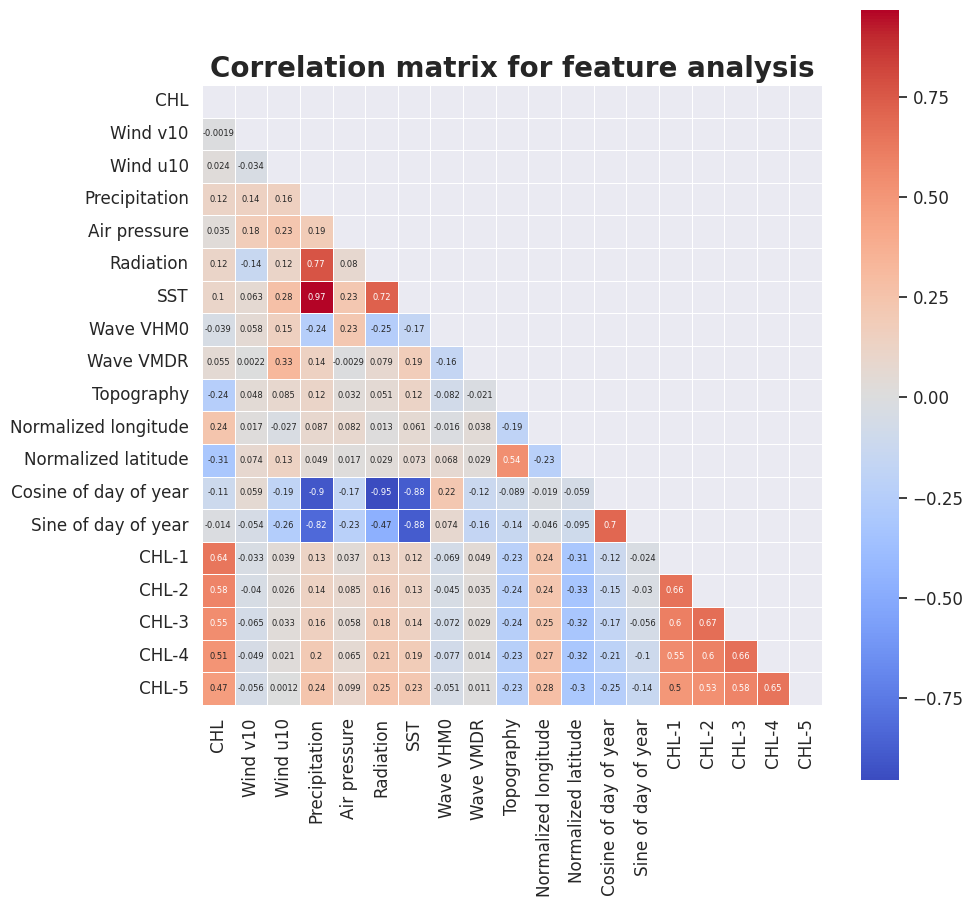

CHL                      1.000000
Wind v10                -0.001942
Wind u10                 0.024209
Precipitation            0.121932
Air pressure             0.034556
Radiation                0.118096
SST                      0.104421
Wave VHM0               -0.039331
Wave VMDR                0.054960
Topography              -0.241978
Normalized longitude     0.240456
Normalized latitude     -0.310012
Cosine of day of year   -0.110285
Sine of day of year     -0.013592
CHL-1                    0.637359
CHL-2                    0.579253
CHL-3                    0.545324
CHL-4                    0.512302
CHL-5                    0.467935
Name: CHL, dtype: float64


In [12]:
sns.set(font_scale=1.1)
# Calculate the correlation matrix
corr_matrix = df_dropped.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6}, 
            mask=mask, square=True, linewidths=.5)
plt.title("Correlation matrix for feature analysis", fontsize=20, fontweight='bold')
plt.show()

# Get the correlation coefficients for the chl column
chl_correlations = corr_matrix['CHL']

# Print the correlation coefficients for the chl column
print(chl_correlations)

### Normalizing the input

In [51]:
df['CHL'] = (df['CHL'] - df['CHL'].min()) / (df['CHL'].max() - df['CHL'].min())    
df['Wind v10'] = (df['Wind v10'] - df['Wind v10'].min()) / (df['Wind v10'].max() - df['Wind v10'].min())
df['Wind u10'] = (df['Wind u10'] - df['Wind u10'].min()) / (df['Wind u10'].max() - df['Wind u10'].min())
df['SST'] = (df['SST'] - df['SST'].min()) / (df['SST'].max() - df['SST'].min())
df['Air Temperature'] = (df['Air Temperature'] - df['Air Temperature'].min()) / (df['Air Temperature'].max() - df['Air Temperature'].min())
df['Precipitation'] = (df['Precipitation'] - df['Precipitation'].min()) / (df['Precipitation'].max() - df['Precipitation'].min())
df['Radiation'] = (df['Radiation'] - df['Radiation'].min()) / (df['Radiation'].max() - df['Radiation'].min())
df['Wave VHM0'] = (df['Wave VHM0'] - df['Wave VHM0'].min()) / (df['Wave VHM0'].max() - df['Wave VHM0'].min())
df['Wave VMDR'] = (df['Wave VMDR'] - df['Wave VMDR'].min()) / (df['Wave VMDR'].max() - df['Wave VMDR'].min())
df['Topography'] = (df['Topography'] - df['Topography'].min()) / (df['Topography'].max() - df['Topography'].min())
df['Cosine of day of year'] = (df['Cosine of day of year'] - df['Cosine of day of year'].min()) / (df['Cosine of day of year'].max() - df['Cosine of day of year'].min())
df['Sine of day of year'] = (df['Sine of day of year'] - df['Sine of day of year'].min()) / (df['Sine of day of year'].max() - df['Sine of day of year'].min())
df['CHL-1'] = (df['CHL-1'] - df['CHL-1'].min()) / (df['CHL-1'].max() - df['CHL-1'].min())
df['CHL-2'] = (df['CHL-2'] - df['CHL-2'].min()) / (df['CHL-2'].max() - df['CHL-2'].min())
df['CHL-3'] = (df['CHL-3'] - df['CHL-3'].min()) / (df['CHL-3'].max() - df['CHL-3'].min())
df['CHL-4'] = (df['CHL-4'] - df['CHL-4'].min()) / (df['CHL-4'].max() - df['CHL-4'].min())
df['CHL-5'] = (df['CHL-5'] - df['CHL-5'].min()) / (df['CHL-5'].max() - df['CHL-5'].min())

# df['5 day mean SST'] = df['SST'].rolling(5, min_periods=1).mean()
# df['5 day sum SST'] = df['SST'].rolling(5, min_periods=5).sum()



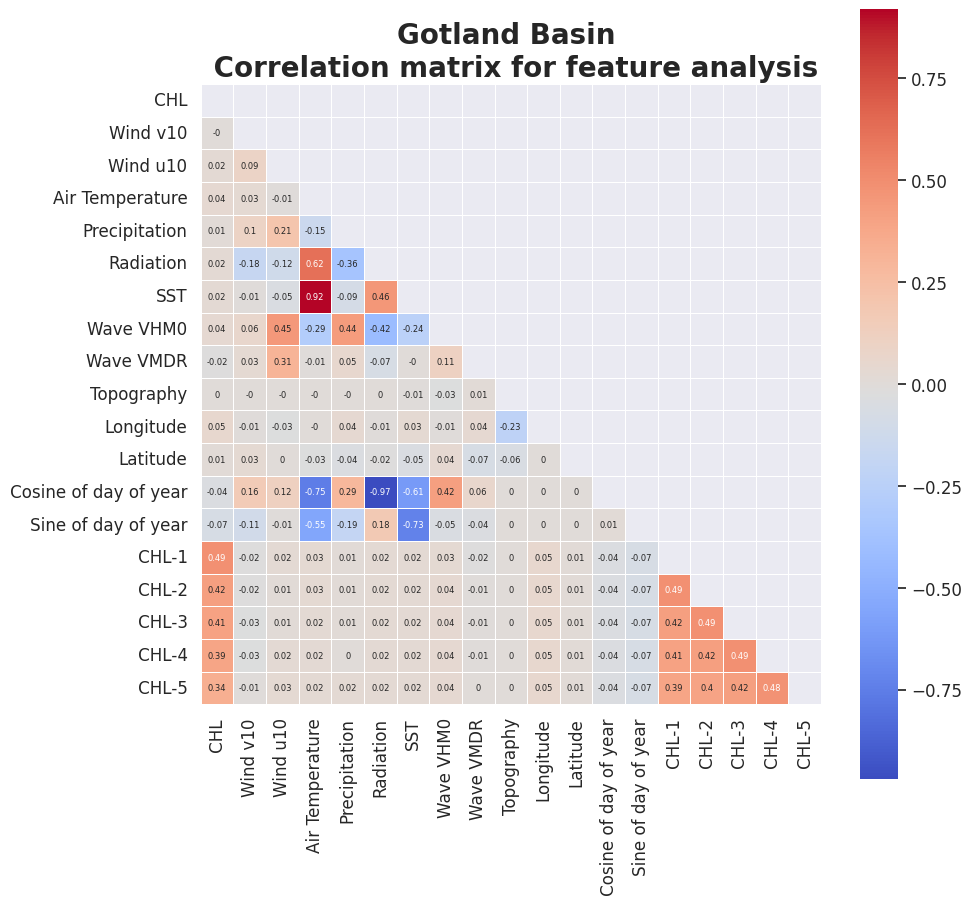

CHL                      1.000000
Wind v10                -0.000481
Wind u10                 0.016189
Air Temperature          0.035127
Precipitation            0.006305
Radiation                0.020709
SST                      0.019307
Wave VHM0                0.043327
Wave VMDR               -0.018449
Topography               0.003174
Longitude                0.052814
Latitude                 0.005914
Cosine of day of year   -0.040992
Sine of day of year     -0.070847
CHL-1                    0.485917
CHL-2                    0.420078
CHL-3                    0.405472
CHL-4                    0.393957
CHL-5                    0.340322
Name: CHL, dtype: float64


In [52]:
sns.set(font_scale=1.1)
# Calculate the correlation matrix
corr_matrix = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(round(corr_matrix,2), annot=True, cmap='coolwarm', annot_kws={"size": 6}, 
            mask=mask, square=True, linewidths=.5)
plt.title("Gotland Basin \n Correlation matrix for feature analysis", fontsize=20, fontweight='bold')
plt.show()

# Get the correlation coefficients for the chl column
chl_correlations = corr_matrix['CHL']

# Print the correlation coefficients for the chl column
print(chl_correlations)

In [53]:
df = df.drop(['CHL-1','CHL-2','CHL-3','CHL-4','CHL-5'], axis=1)

In [54]:
correlation = df.corr(method='spearman')

In [55]:
correlation = correlation.to_numpy()

(14, 14)
[[0.         0.9995193  0.98381141 0.96487273 0.99369523 0.979291
  0.98069291 0.95667262 0.98155071 0.99682619 0.9471855  0.99408554
  0.95900797 0.92915313]
 [0.9995193  0.         0.90952352 0.96733731 0.90401883 0.81507738
  0.99276184 0.93784774 0.97487777 0.99971754 0.99459977 0.97041848
  0.84137331 0.89031962]
 [0.98381141 0.90952352 0.         0.99384873 0.78672646 0.87784551
  0.95017264 0.54506759 0.68535097 0.99882676 0.97402599 0.99563914
  0.8821684  0.99135029]
 [0.96487273 0.96733731 0.99384873 0.         0.85107134 0.38153886
  0.08096244 0.71449528 0.99493877 0.99788472 0.99862385 0.97208675
  0.25052636 0.45233429]
 [0.99369523 0.90401883 0.78672646 0.85107134 0.         0.64360931
  0.91484426 0.55937852 0.95308204 0.99637046 0.96243194 0.96112536
  0.70551799 0.81493932]
 [0.979291   0.81507738 0.87784551 0.38153886 0.64360931 0.
  0.54303456 0.57862755 0.92693924 0.99602297 0.99202035 0.98279484
  0.02679034 0.81691951]
 [0.98069291 0.99276184 0.95017264 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [18.125, 18.125, 73.75, 73.75],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [45.9375, 45.9375, 120.0, 120.0]],
 'dcoord': [[0.0, 0.5450675942548376, 0.5450675942548376, 0.0],
  [0.0, 0.026790344714620384, 0.026790344714620384, 0.0],
  [0.0, 0.7055179921638564, 0.7055179921638564, 0.026790344714620384],
  [0.5450675942548376,
   0.882168395327266,
   0.882168395327266,
   0.7055179921638564],
  [0.0, 0.9378477365720996, 0.9378477365720996, 0.882168395327266],
  [0.0, 0.0809624399303952, 0.0809624399303952, 0.0],
  [0.0, 0.45233429086396093, 0.45233429086396093, 0.0809624399303952],
  [0.0, 0.9806929146205765, 0.9806929146205765, 0.45233429086396093],
  [0.9378477365720996,
   0.9995192964527575,
   0.9

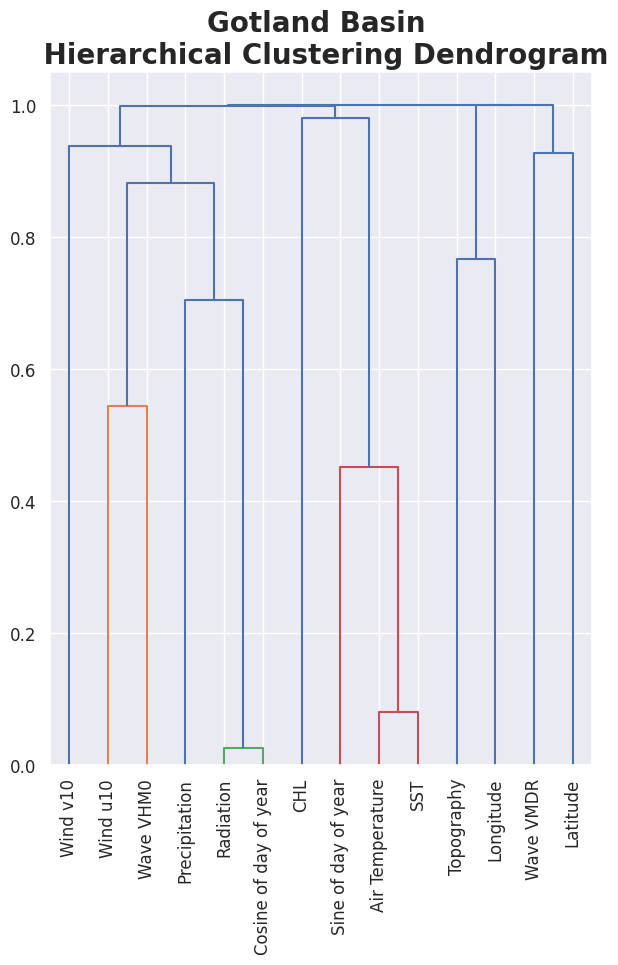

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
#from https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering
plt.figure(figsize=(7,9))
plt.title('Gotland Basin \n Hierarchical Clustering Dendrogram', fontsize=20, fontweight='bold')
dissimilarity = 1 - abs(correlation)
print(dissimilarity.shape)
print(dissimilarity)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=df.columns, orientation='top', 
           leaf_rotation=90)

In [20]:
# Clustering the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
print(labels)
print(df.columns)

[5 3 7 1 2 1 1 2 7 6 8 5 1 4]
Index(['CHL', 'Wind v10', 'Wind u10', 'Precipitation', 'Air pressure',
       'Radiation', 'SST', 'Wave VHM0', 'Wave VMDR', 'Topography', 'Longitude',
       'Latitude', 'Cosine of day of year', 'Sine of day of year'],
      dtype='object')


## Feature importance using random forest feature selection

In [30]:
# Split the data into input and output variables
X = df_dropped.drop('CHL', axis=1)
y = df_dropped['CHL']

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# # Create a Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fit the model to the data
# rf.fit(X, y)

# Get the feature importances from the model
importances = rf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(feature, importance)

### Simple Random Forest Model

In [55]:
# drop rows with missing values
df_dropped = df.dropna()
df_dropped

,CHL,Wind v10,Wind u10,Air Temperature,Prescipitation,Radiation,SST,Wave VHM0,Wave VMDR,Topography,Longitude,Latitude,Cosine of day of year,Sine of day of year,CHL-1,CHL-2,CHL-3,CHL-4,CHL-5
19173600,0.003411,0.337331,0.524247,0.644307,0.000000,0.923091,0.501973,0.135026,0.932074,0.092513,0.000000,0.974844,0.134303,0.840992,0.022598,0.040264,0.016770,0.017665,0.018083
19173760,0.004395,0.337259,0.524591,0.644039,0.000000,0.923131,0.501614,0.134565,0.931704,0.113972,0.000000,0.981132,0.134303,0.840992,0.018609,0.048756,0.026760,0.032800,0.021229
19173920,0.015799,0.337187,0.524934,0.643772,0.000000,0.923170,0.501614,0.133918,0.931352,0.123987,0.000000,0.987422,0.134303,0.840992,0.020753,0.060111,0.015277,0.021169,0.014520
19173921,0.007087,0.338218,0.524281,0.644355,0.000000,0.923198,0.502332,0.133004,0.929589,0.115880,0.006289,0.987422,0.134303,0.840992,0.023358,0.032384,0.022509,0.015436,0.020022
19174080,0.013896,0.337115,0.525278,0.643504,0.000000,0.923209,0.501256,0.133226,0.930984,0.123987,0.000000,0.993712,0.134303,0.840992,0.015529,0.041411,0.020085,0.012713,0.017015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64997448,0.038297,0.518799,0.217860,0.548611,0.001980,0.612634,0.217079,0.107931,0.157272,0.109204,0.050314,0.968555,0.400145,0.989936,0.013286,0.010536,0.011482,0.010470,0.010545
64997604,0.019671,0.519945,0.216544,0.547551,0.002111,0.612086,0.209185,0.129670,0.106478,0.113972,0.025157,0.974844,0.400145,0.989936,0.009813,0.009597,0.010402,0.025004,0.010831
64997605,0.021276,0.519544,0.216669,0.547770,0.002066,0.612211,0.210621,0.125027,0.107164,0.110157,0.031447,0.974844,0.400145,0.989936,0.010371,0.010516,0.010453,0.031100,0.010072
64997767,0.017643,0.518283,0.216098,0.548028,0.001925,0.612416,0.213491,0.120251,0.113475,0.099666,0.044025,0.981132,0.400145,0.989936,0.012283,0.012463,0.011626,0.045075,0.012957


In [56]:
# Split the data into input and output variables
X = df_dropped.drop('CHL', axis=1)
y = df_dropped['CHL']

print("First method: Show importance of each feature")

# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances from the model
importances = rf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    with open('FeaturesRIGA.txt', 'a') as f:
            f.write(f'{feature}, {importance} \n')
    print(feature, importance)

First method: Show importance of each feature
Wind v10 0.037091302969405826
Wind u10 0.04102177717718944
Air Temperature 0.03845713311969107
Prescipitation 0.022827061646320895
Radiation 0.03996087096073141
SST 0.03278969822850441
Wave VHM0 0.03258183084372933
Wave VMDR 0.0368900313735302
Topography 0.03384464413670144
Longitude 0.030444084302360327
Latitude 0.0337490826108143
Cosine of day of year 0.010572757235882142
Sine of day of year 0.014684780166418958
CHL-1 0.398959551468419
CHL-2 0.09506985986096128
CHL-3 0.03795278200978669
CHL-4 0.031723886647147176
CHL-5 0.03137886524240614


### Plot the Feature Analysis Results from the Random Forest

In [37]:
random_forest_features = pd.read_csv('FeaturesGTL.txt', header=None)
random_forest_features

,0,1
0,Wind v10,0.059859
1,Wind u10,0.054835
2,Air Temperature,0.045910
3,Precipitation,0.015499
4,Radiation,0.055822
5,SST,0.071722
6,Wave VHM0,0.049822
7,Wave VMDR,0.047958
8,Topography,0.030353
9,Longitude,0.032675


In [38]:
random_forest_features.iloc[9,0] = 'Longitude'
random_forest_features.iloc[10,0] = 'Latitude'

Text(0.5, 1.0, 'Gotland Basin \n Feature Importance Analysis using Random Forest')

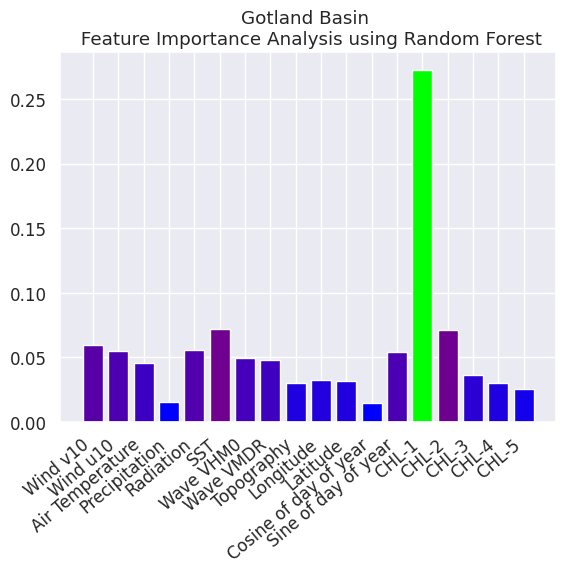

In [39]:
my_cmap = plt.get_cmap("brg")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(random_forest_features[0], random_forest_features[1], color=my_cmap(rescale(random_forest_features[1])))
plt.xticks(rotation=40, ha='right')
plt.title("Gotland Basin \n Feature Importance Analysis using Random Forest")

In [23]:
random_forest_features = random_forest_features.drop(random_forest_features.index[13])
random_forest_features

,0,1
0,Wind v10,0.037538
1,Wind u10,0.041735
2,Precipitation,0.039048
3,Air pressure,0.017666
4,Radiation,0.040337
5,SST,0.033410
6,Wave VHM0,0.032780
7,Wave VMDR,0.037209
8,Topography,0.033913
9,Normalized longitude,0.030977


: 

Text(0.5, 1.0, 'Feature Importance Analysis using Random Forest')

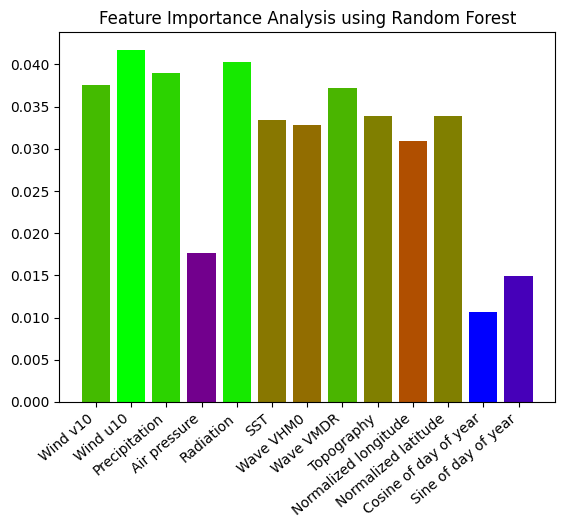

In [14]:
my_cmap = plt.get_cmap("brg")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(random_forest_features[0], random_forest_features[1], color=my_cmap(rescale(random_forest_features[1])))
plt.xticks(rotation=40, ha='right')
plt.title("Feature Importance Analysis using Random Forest")